# Latent Dirichlet Allocation

In [1]:
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import gensim.corpora as corpora
import re
import pprint
import pandas as pd


In [2]:
df = pd.read_csv('data', sep=",", header=None)

df.columns = ['text']

df.head()

FileNotFoundError: [Errno 2] File b'data' does not exist: b'data'

In [3]:
df.loc[0].text

'From: gld@cunixb.cc.columbia.edu (Gary L Dare)\nSubject: Stan Fischler, 4/4\nSummary: From the Devils pregame show, prior to hosting the Penguins\nNntp-Posting-Host: cunixb.cc.columbia.edu\nReply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)\nOrganization: PhDs In The Hall\nLines: 32\n\n\nAt the Lester Patrick Awards lunch, Bill Torrey mentioned that one of his\noptions next season is to be president of the Miami team, with Bob Clarke\nworking for him.  At the same dinner, Clarke said that his worst mistake\nin Philadelphia was letting Mike Keenan go -- in retrospect, almost all\nplayers came realize that Keenan knew what it took to win.  Rumours are\nnow circulating that Keenan will be back with the Flyers.\n\nNick Polano is sick of being a scapegoat for the schedule made for the\nRed Wings; After all, Bryan Murray approved it.\n\nGerry Meehan and John Muckler are worried over the Sabres\' prospects;\nAssistant Don Lever says that the Sabres have to get their share now,\nbecause a Que

## Preprocessing 

👇 You're used to it by now... Clean up! Store the cleaned text in a new dataframe column "clean_text".

In [4]:
df['text_a'] = df['text'] #df['text'].str.replace(r'\S*@\S*\s?', "")

In [5]:
df.loc[0].text_a

'From: gld@cunixb.cc.columbia.edu (Gary L Dare)\nSubject: Stan Fischler, 4/4\nSummary: From the Devils pregame show, prior to hosting the Penguins\nNntp-Posting-Host: cunixb.cc.columbia.edu\nReply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)\nOrganization: PhDs In The Hall\nLines: 32\n\n\nAt the Lester Patrick Awards lunch, Bill Torrey mentioned that one of his\noptions next season is to be president of the Miami team, with Bob Clarke\nworking for him.  At the same dinner, Clarke said that his worst mistake\nin Philadelphia was letting Mike Keenan go -- in retrospect, almost all\nplayers came realize that Keenan knew what it took to win.  Rumours are\nnow circulating that Keenan will be back with the Flyers.\n\nNick Polano is sick of being a scapegoat for the schedule made for the\nRed Wings; After all, Bryan Murray approved it.\n\nGerry Meehan and John Muckler are worried over the Sabres\' prospects;\nAssistant Don Lever says that the Sabres have to get their share now,\nbecause a Que

In [6]:
def remove_numbers(txt):
    result = ''.join([i for i in txt if not i.isdigit()])    
    return result

In [7]:
df['text_a'] = df['text_a'].dropna().apply(lambda x: remove_numbers(x))

In [8]:
df.loc[0].text_a

'From: gld@cunixb.cc.columbia.edu (Gary L Dare)\nSubject: Stan Fischler, /\nSummary: From the Devils pregame show, prior to hosting the Penguins\nNntp-Posting-Host: cunixb.cc.columbia.edu\nReply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)\nOrganization: PhDs In The Hall\nLines: \n\n\nAt the Lester Patrick Awards lunch, Bill Torrey mentioned that one of his\noptions next season is to be president of the Miami team, with Bob Clarke\nworking for him.  At the same dinner, Clarke said that his worst mistake\nin Philadelphia was letting Mike Keenan go -- in retrospect, almost all\nplayers came realize that Keenan knew what it took to win.  Rumours are\nnow circulating that Keenan will be back with the Flyers.\n\nNick Polano is sick of being a scapegoat for the schedule made for the\nRed Wings; After all, Bryan Murray approved it.\n\nGerry Meehan and John Muckler are worried over the Sabres\' prospects;\nAssistant Don Lever says that the Sabres have to get their share now,\nbecause a Quebec 

In [13]:
def preprocessing(text):
    text = text.replace(r'/^\s+|\s+$|\s+(?=\s)/g', ' ') # not working as intended I think
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    cleaned_text = text.lower()
    cleaned_text = cleaned_text.replace(r'\d+', ' ')
    #result = ''.join([i for i in s if not i.isdigit()])    
    cleaned_text = cleaned_text.replace("\n", " ")
    cleaned_text = cleaned_text.replace("\t", " ")
    cleaned_text = cleaned_text.replace(r' +', ' ')
    return cleaned_text

In [14]:
df['clean_reviews'] = df.text_a.apply(preprocessing)

In [15]:
df.loc[0].clean_reviews

'from  gld cunixb cc columbia edu  gary l dare  subject  stan fischler    summary  from the devils pregame show  prior to hosting the penguins nntp posting host  cunixb cc columbia edu reply to  gld cunixb cc columbia edu  gary l dare  organization  phds in the hall lines     at the lester patrick awards lunch  bill torrey mentioned that one of his options next season is to be president of the miami team  with bob clarke working for him   at the same dinner  clarke said that his worst mistake in philadelphia was letting mike keenan go    in retrospect  almost all players came realize that keenan knew what it took to win   rumours are now circulating that keenan will be back with the flyers   nick polano is sick of being a scapegoat for the schedule made for the red wings  after all  bryan murray approved it   gerry meehan and john muckler are worried over the sabres  prospects  assistant don lever says that the sabres have to get their share now  because a quebec dynasty is emerging   

In [13]:
df['clean_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['clean_reviews']), axis=1)

In [14]:
stop_words = set(stopwords.words('english')) 

#word_tokens = word_tokenize(text) 
def remove_stopwords(txt):
    
    txt_nostops = ' '.join([w for w in txt if not w in stop_words]) 
    return txt_nostops 

In [15]:
df['clean_reviews'] = df['clean_reviews'].dropna().apply(lambda x: remove_stopwords(x))

In [16]:
df['clean_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['clean_reviews']), axis=1)

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
def lemmatize(txt):
    txt_lemma = ' '.join([lemmatizer.lemmatize(word) for word in txt]) 
    return txt_lemma

In [19]:
df['clean_reviews'] = df['clean_reviews'].dropna().apply(lambda x: lemmatize(x))

In [20]:
df.loc[0].clean_reviews

'gld cunixb cc columbia edu gary l dare subject stan fischler summary devil pregame show prior hosting penguin nntp posting host cunixb cc columbia edu reply gld cunixb cc columbia edu gary l dare organization phd hall line lester patrick award lunch bill torrey mentioned one option next season president miami team bob clarke working dinner clarke said worst mistake philadelphia letting mike keenan go retrospect almost player came realize keenan knew took win rumour circulating keenan back flyer nick polano sick scapegoat schedule made red wing bryan murray approved gerry meehan john muckler worried sabre prospect assistant lever say sabre get share quebec dynasty emerging mighty duck declared throw money around loosely buy team oiler coach ted green remarked guy around fill tie domi skate none fill helmet senator andrew mcbain told security guard chicago stadium warned stair leading locker room mcbain mouthed seasoned professional tumbled entire steep flight gld je souviens gary l dar

In [21]:
df.head()

,text,text_a,clean_reviews
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,gld cunixb cc columbia edu gary l dare subject...
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...,From: atterlep@vela.acs.oakland.edu (Cardinal ...,atterlep vela ac oakland edu cardinal ximenez ...
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...,miner kuhub cc ukans edu subject ancient book ...
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...,From: atterlep@vela.acs.oakland.edu (Cardinal ...,atterlep vela ac oakland edu cardinal ximenez ...
4,From: vzhivov@superior.carleton.ca (Vladimir Z...,From: vzhivov@superior.carleton.ca (Vladimir Z...,vzhivov superior carleton ca vladimir zhivov s...


The data is a collection of emails that are not labelled. Let's try extract topics from them!

## Latent Dirichlet Allocation model

👇 Train an LDA model to extract potential topics.

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from  sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.2, max_df=0.7).fit(df['clean_reviews'])

data_vectorized = vectorizer.transform(df['clean_reviews'])

lda_model = LatentDirichletAllocation(n_components=2).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('god', 152.47604772242985), ('christian', 107.07975232770626), ('would', 96.10051717067805), ('com', 95.17308980526893), ('one', 95.06097322714048), ('people', 92.18710540046656), ('edu', 87.0931123398669), ('know', 73.89212606306563), ('say', 69.1072849866848), ('think', 65.95870851912886)]
Topic 1:
[('edu', 148.71343650092504), ('ca', 121.2832646955435), ('game', 114.5828016728903), ('team', 110.71375652787485), ('university', 86.25000955152997), ('hockey', 80.83922557241414), ('year', 73.07020838203371), ('go', 70.3556513034166), ('posting', 62.86332528567348), ('host', 55.0349226111371)]


## Visualize potential topics

👇 The function to print the words associated with the potential topics is already made for you. You just have to pass the correct arguments!

In [23]:
# done above
df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['clean_reviews']), axis=1)
df.head()

,text,text_a,clean_reviews,tokens
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,gld cunixb cc columbia edu gary l dare subject...,"[gld, cunixb, cc, columbia, edu, gary, l, dare..."
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...,From: atterlep@vela.acs.oakland.edu (Cardinal ...,atterlep vela ac oakland edu cardinal ximenez ...,"[atterlep, vela, ac, oakland, edu, cardinal, x..."
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...,miner kuhub cc ukans edu subject ancient book ...,"[miner, kuhub, cc, ukans, edu, subject, ancien..."
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...,From: atterlep@vela.acs.oakland.edu (Cardinal ...,atterlep vela ac oakland edu cardinal ximenez ...,"[atterlep, vela, ac, oakland, edu, cardinal, x..."
4,From: vzhivov@superior.carleton.ca (Vladimir Z...,From: vzhivov@superior.carleton.ca (Vladimir Z...,vzhivov superior carleton ca vladimir zhivov s...,"[vzhivov, superior, carleton, ca, vladimir, zh..."


In [24]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [25]:
# create id2word
id2word = corpora.Dictionary(df['tokens'])

# Create Corpus
texts = df['tokens']

# Creat Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [26]:
# not really ldamallet - stole my old code and not going to edit since this is just playing
# it is just a variable name here though, so does not matter! (ldamallet requires an install, but can often give
# better results... Google it)
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)

In [27]:
# Showing coherence score

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.4690125368782961


In [28]:
pp = pprint.PrettyPrinter(indent=4)

In [29]:
pp.pprint(ldamallet.show_topics(formatted=False))

[   (   0,
        [   ('edu', 0.010440069),
            ('god', 0.008846677),
            ('would', 0.0060142907),
            ('subject', 0.005099839),
            ('one', 0.0050492785),
            ('line', 0.004963782),
            ('organization', 0.0048833634),
            ('game', 0.00397929),
            ('team', 0.0039424677),
            ('writes', 0.0038885064)]),
    (   1,
        [   ('edu', 0.0077830525),
            ('line', 0.0065001077),
            ('subject', 0.0059588407),
            ('one', 0.005109313),
            ('organization', 0.005075315),
            ('god', 0.0043437732),
            ('would', 0.004334297),
            ('team', 0.0041916883),
            ('game', 0.0041573485),
            ('people', 0.0037806057)])]


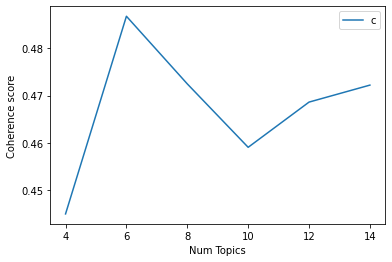

In [30]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=4):
    '''
    Compute coherence for given number of topics

    Parameters:
    
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        start: minimum number of topics
        limit : Max num of topics
        step: step between topic numbers

    Returns:
    
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    '''
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Running the above function. Can take a long time to run!
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)


# Show graph of LDA coherence scores
# ATTEN: parameters here have to match those of you function to display properly!
limit = 16
start = 4
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
# choose best model and enter index into model_list[] (note: remember they are zero indexed!)
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pp.pprint(optimal_model.print_topics(num_words=10))

[   (   0,
        '0.008*"edu" + 0.007*"god" + 0.006*"subject" + 0.006*"one" + '
        '0.005*"line" + 0.005*"would" + 0.004*"ca" + 0.004*"christian" + '
        '0.004*"people" + 0.004*"organization"'),
    (   1,
        '0.010*"edu" + 0.007*"subject" + 0.006*"line" + 0.006*"god" + '
        '0.006*"organization" + 0.005*"would" + 0.004*"writes" + 0.004*"one" + '
        '0.004*"people" + 0.003*"com"'),
    (   2,
        '0.009*"edu" + 0.006*"team" + 0.006*"organization" + 0.006*"god" + '
        '0.005*"line" + 0.005*"subject" + 0.004*"time" + 0.004*"would" + '
        '0.004*"one" + 0.004*"v"'),
    (   3,
        '0.009*"edu" + 0.007*"subject" + 0.007*"line" + 0.006*"game" + '
        '0.006*"would" + 0.006*"team" + 0.006*"one" + 0.005*"organization" + '
        '0.005*"god" + 0.004*"think"'),
    (   4,
        '0.011*"edu" + 0.006*"line" + 0.006*"one" + 0.006*"would" + '
        '0.005*"subject" + 0.004*"game" + 0.004*"organization" + 0.004*"com" + '
        '0.004*"know" + 

In [32]:
# install this
! pip install pyLDAvis

You should consider upgrading via the '/home/jesselehrke/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7 -m pip install --upgrade pip' command.


In [33]:
# import it
import pyLDAvis
import pyLDAvis.gensim

In [34]:
# run it... want to get this out to you, so no documentation
# however, a good LDA will not have circles that overlap too much and are spaced out... but it will rarely be perfect
# so don't over think it!
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

/home/jesselehrke/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/jesselehrke/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.005920  0.008588       1        1  28.634851
5      0.013798  0.004095       2        1  24.655701
3     -0.009332  0.002265       3        1  19.359034
4     -0.003214 -0.008077       4        1  10.843018
0      0.003296 -0.000551       5        1   8.820708
1      0.001371 -0.006320       6        1   7.686685, topic_info=     Category         Freq          Term        Total  loglift  logprob
28    Default  1911.000000           edu  1911.000000  30.0000  30.0000
196   Default  1542.000000           god  1542.000000  29.0000  29.0000
121   Default  1177.000000       subject  1177.000000  28.0000  28.0000
57    Default  1227.000000          line  1227.000000  27.0000  27.0000
78    Default  1094.000000           one  1094.000000  26.0000  26.0000
577   Default   540.000000           com   540.000000  25.0000  25.0000
447   Default  1125.000000         would  1125.000000  24.0000  24.0000
172   Default   682.000000            ca   682.000000  23.0000  23.0000
80    Default  1090.000000  organization  1090.000000  22.0000  22.0000
263   Default   735.000000        writes   735.000000  21.0000  21.0000
37    Default   436.000000           get   436.000000  20.0000  20.0000
915   Default   644.000000          know   644.000000  19.0000  19.0000
477   Default   881.000000          game   881.000000  18.0000  18.0000
179   Default   442.000000        church   442.000000  17.0000  17.0000
424   Default   580.000000         jesus   580.000000  16.0000  16.0000
1590  Default   303.000000            pt   303.000000  15.0000  15.0000
219   Default   759.000000        people   759.000000  14.0000  14.0000
177   Default   794.000000     christian   794.000000  13.0000  13.0000
705   Default   590.000000        hockey   590.000000  12.0000  12.0000
123   Default   893.000000          team   893.000000  11.0000  11.0000
243   Default   458.000000           see   458.000000  10.0000  10.0000
255   Default   688.000000    university   688.000000   9.0000   9.0000
39    Default   598.000000            go   598.000000   8.0000   8.0000
153   Default   627.000000       article   627.000000   7.0000   7.0000
202   Default   614.000000          like   614.000000   6.0000   6.0000
772   Default   577.000000          year   577.000000   5.0000   5.0000
253   Default   567.000000             u   567.000000   4.0000   4.0000
103   Default   639.000000           say   639.000000   3.0000   3.0000
637   Default   423.000000         point   423.000000   2.0000   2.0000
85    Default   474.000000        player   474.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
577    Topic6    54.587246           com   540.564514   0.2729  -5.7258
496    Topic6    29.682552            la   253.976883   0.4190  -6.3351
813    Topic6    21.008997          shot   173.854294   0.4524  -6.6807
1999   Topic6     9.241755       alchemy    61.591064   0.6689  -7.5019
705    Topic6    53.355438        hockey   590.051270   0.1624  -5.7486
1455   Topic6    17.717360           son   142.659744   0.4798  -6.8511
1458   Topic6    16.781643        spirit   134.854370   0.4818  -6.9053
230    Topic6    40.125393      question   426.821960   0.2013  -6.0336
219    Topic6    61.870899        people   759.937256   0.0575  -5.6006
243    Topic6    41.765930           see   458.668884   0.1694  -5.9935
39     Topic6    50.569321            go   598.457886   0.0947  -5.8023
196    Topic6   101.575897           god  1542.071411  -0.1544  -5.1048
205    Topic6    35.015041          many   367.280731   0.2153  -6.1698
447    Topic6    78.893166         would  1125.713013  -0.0924  -5.3575
153    Topic6    50.791744       article   627.653564   0.0514  -5.7979
424    Topic6    46.800640         jesus   580.925415   0.0470  -5.8797
78     Topic6    72.161552           one  1094.718750  -0.1537  -5.44

## Predict topic of new text

👇 You can now use your LDA model to predict the topic of a new text. First, use your vectorizer to vectorize the example. Then, use your LDA model to predict the topic of the vectorized example.

In [ ]:
# skipping for now to try last challenge

# first clean new text
